# Flujo Completo CLUSTERING

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Importamos datos en un Dataframe

In [4]:
df_data = pd.read_excel(r'C:\Users\Iván\Dropbox\Creación de MOCs\MOC Machine Learning con Python\Casos Prácticos ML\Clustering\iris.xlsx')

# Creamos una instancia del modelo K-Means (ejemplo = 3 clusters)

In [5]:
model = KMeans(n_clusters=3)

In [6]:
X = df_data.drop('clase', axis=1) #Eliminamos la columna de datos etiquetados, Clustering es NO SUPERVISADO

In [7]:
X.head()

,long_sepalo,anch_sepalo,long_petalo,anch_petalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X = X.drop(["anch_sepalo","anch_petalo"],axis=1) # Nos quedamos con 2 variables para visualización 2D (didáctico)

In [9]:
X.head()

,long_sepalo,long_petalo
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [10]:
X = X.values

# Entrenamos el modelo

In [11]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Representamos Puntos y Centroides

In [12]:
# Obtener los Centroides
centroids = model.cluster_centers_

# Asignar las coordenadas de los centroides: centroids_x, centroids_y (cada fila de "centroids" tiene las coordenadas de 1 centroide)
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

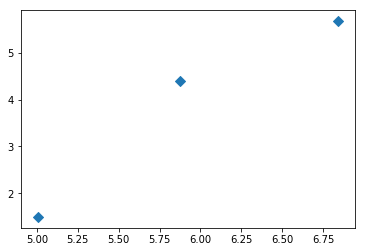

In [13]:
# Scatter plot de los centroides
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

In [14]:
print(model.labels_) #Son las etiquetas de cluster que el algoritmo ha asignado a cada punto

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


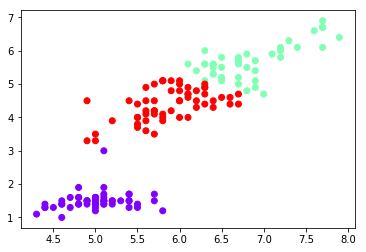

In [15]:
plt.scatter(X[:,0],X[:,1], c=model.labels_, cmap='rainbow')
plt.show()

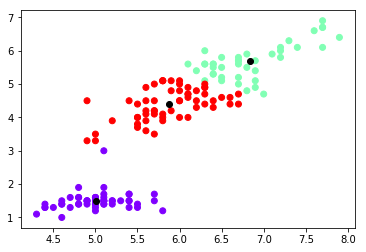

In [16]:
plt.scatter(X[:,0], X[:,1], c=model.labels_, cmap='rainbow')  
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1], color='black')
plt.show()

# Cálculo con 2 centroides

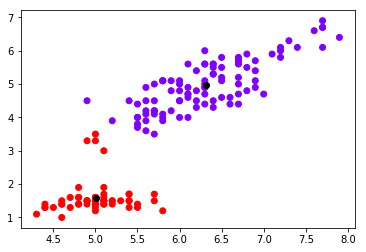

In [21]:
model_2 = KMeans(n_clusters=2)
model_2.fit(X)
plt.scatter(X[:,0], X[:,1], c=model_2.labels_, cmap='rainbow')  
plt.scatter(model_2.cluster_centers_[:,0] ,model_2.cluster_centers_[:,1], color='black')
plt.show()

# Buscar el mejor valor de k

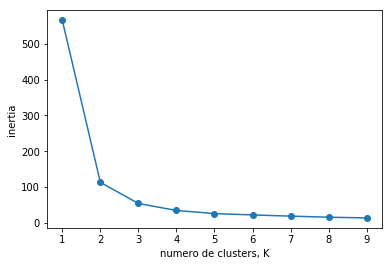

In [19]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Crear instancia KMeans con k clusters: model
    model=KMeans(n_clusters=k)
    
    # Entrenar el modelo con nuestros datos
    model.fit(X)
    
    # Añadir el atributo de inercia a la lista de inercias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('numero de clusters, K')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()